In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-most-streamed-songs/Spotify Most Streamed Songs.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/spotify-most-streamed-songs/Spotify Most Streamed Songs.csv')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [5]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')

In [6]:
# Columns you want to drop
cols_to_drop = ['track_name', 'artist(s)_name', 'cover_url']

# Drop them only if they exist
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

In [7]:
# Check for missing values
df.isnull().sum()

# Drop rows with any missing values (for simplicity)
df.dropna(inplace=True)

# Drop non-numeric, non-useful columns if they exist
cols_to_drop = ['track_name', 'artist(s)_name', 'cover_url']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Convert percentage columns to float safely
percent_cols = [col for col in df.columns if col.endswith('%')]
for col in percent_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('%', '', regex=False).astype(float)
    else:
        df[col] = df[col].astype(float)

# Check cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist_count          817 non-null    int64  
 1   released_year         817 non-null    int64  
 2   released_month        817 non-null    int64  
 3   released_day          817 non-null    int64  
 4   in_spotify_playlists  817 non-null    int64  
 5   in_spotify_charts     817 non-null    int64  
 6   streams               817 non-null    object 
 7   in_apple_playlists    817 non-null    int64  
 8   in_apple_charts       817 non-null    int64  
 9   in_deezer_playlists   817 non-null    object 
 10  in_deezer_charts      817 non-null    int64  
 11  in_shazam_charts      817 non-null    object 
 12  bpm                   817 non-null    int64  
 13  key                   817 non-null    object 
 14  mode                  817 non-null    object 
 15  danceability_%        817 no

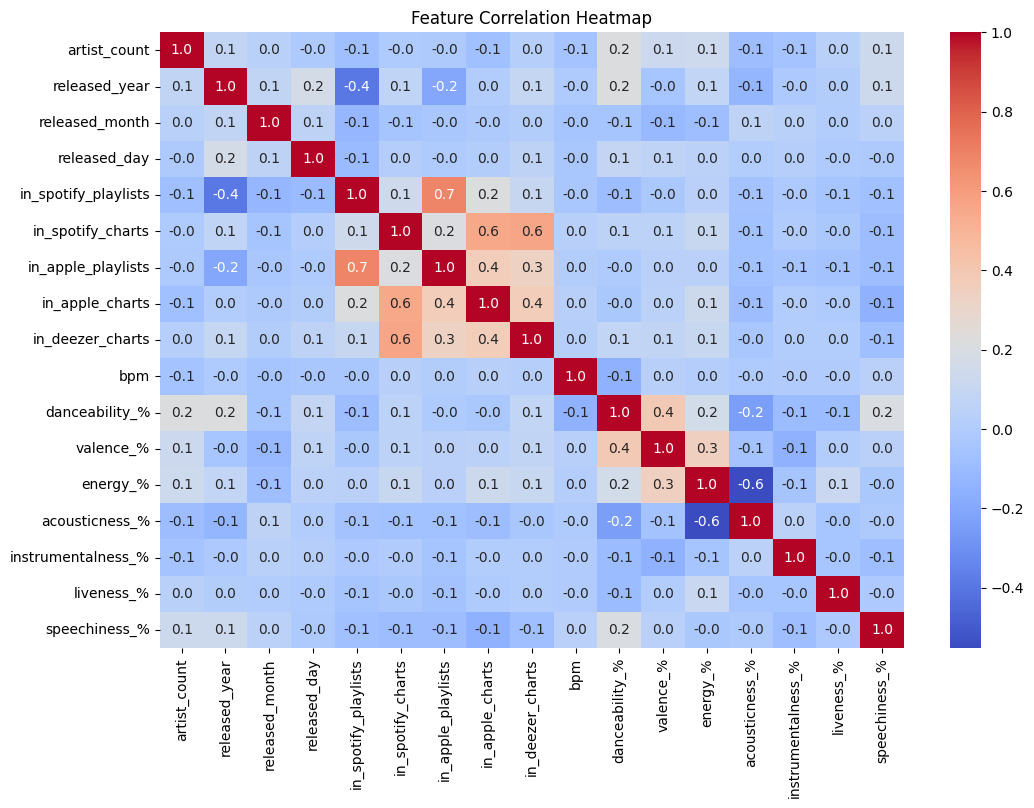

'streams' column not found in numeric data.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Only select numeric columns ---
numeric_df = df.select_dtypes(include='number')

# --- Correlation Heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.1f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# --- Top 5 Features Most Correlated with 'streams' ---
if 'streams' in numeric_df.columns:
    top_features = numeric_df.corr()['streams'].drop('streams').sort_values(ascending=False).head(5).index

    for feature in top_features:
        sns.scatterplot(data=df, x=feature, y='streams')
        plt.title(f"{feature} vs Streams")
        plt.xlabel(feature)
        plt.ylabel('Streams')
        plt.show()
else:
    print("'streams' column not found in numeric data.")

In [9]:
# Ensure 'streams' exists and is numeric
if 'streams' in df.columns:
    df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
    df = df.dropna(subset=['streams'])  # drop rows where 'streams' is NaN
else:
    raise ValueError("'streams' column not found in the dataset")

# Drop object/categorical columns safely
drop_cols = ['track_name', 'artist(s)_name', 'cover_url',
             'in_deezer_playlists', 'in_shazam_charts', 'key', 'mode']
existing_drop_cols = [col for col in drop_cols if col in df.columns]
X = df.drop(columns=existing_drop_cols + ['streams'], errors='ignore')

# Keep only numeric columns
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()

# Align target with features
y = df.loc[X.index, 'streams']

In [10]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train and evaluate model
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [12]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.8019349292249542
